# Overview
This dataset contains hundreds of free vehicle ads posted on one website every day.

## Objective
 
To study the data collected over the past few years and to determine what factors influence the price of a vehicle. To do so, i'm going to do the exploratory data analysis and then get conclusions about it.

# Step 1. Import libraries and dataset

In [80]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Importing dataset
df = pd.read_csv('/datasets/vehicles_us.csv')


# Step 2. Dataset review

In [82]:
# Showing the general dataset columns and rows's size
df.shape

(51525, 13)

In [84]:
# Showing the quantity of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [83]:
# Showing a dataset's sample
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [85]:
# Null percent values
100 * pd.isna(df).sum() / df.shape[0]

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

After the review, we get the following founds:
- `price`: the type is `integer`, it should be `float` type.
- `model_year`: the type is `float`, it should be `integer` type because it's about years. Also, this columns has `nan values`.
- `cylinders`: the type is `float`, it should be `integer`. Also, this columns has `nan values`.
- `fuel` — is ok.
- `odometer`: has `nan values`.
- `paint_color`: has `nan values`.
- `is_4wd`: the type is `float`, it should be `integer` type because it's boolean type. Also, this columns has `nan values`.
- `date_posted`: the type is `object`, it should be `datetime` type because it's about dates. 

# Step 3. Missing values treatment

## Column `is_4wd`
The values´s 50% has 1 as a value and the another half have nan values. Because this column is boolean type and `1` means `true` and `0` means `false`, it can be deduced that all nan values would be 0. 

In [86]:
#Show nan values quantity
df['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [87]:
# Filling null values with 0
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

## Columns `model_year`
This feature has 7% of null values, so it will be imputed in function with `model` column because it is the one that is most related.

In [88]:
# Showing the nan values percent.
100* (df['model_year'].isna().sum()/df.shape[0])

7.023774866569626

In [89]:
# Showing the quantity of null model_year's values grouped by 'model' and sorted
df.loc[df['model_year'].isna()].groupby('model')['model'].count().sort_values()

model
mercedes-benz benze sprinter 2500      7
honda civic lx                        11
acura tl                              12
hyundai santa fe                      13
buick enclave                         14
                                    ... 
honda accord                          80
chevrolet silverado                   98
ram 1500                             117
chevrolet silverado 1500             155
ford f-150                           191
Name: model, Length: 100, dtype: int64

In [91]:
#Showing the model_year's mean and median for each model 
print(df.groupby('model')['model_year'].mean())
print(df.groupby('model')['model_year'].median())

model
acura tl             2007.517857
bmw x5               2008.991870
buick enclave        2012.194553
cadillac escalade    2008.508475
chevrolet camaro     2008.397959
                        ...     
toyota sienna        2008.584416
toyota tacoma        2009.331599
toyota tundra        2009.350352
volkswagen jetta     2010.779381
volkswagen passat    2011.253086
Name: model_year, Length: 100, dtype: float64
model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64


Because, there are some differences between the mean and the median, the best option, in this case, to fill the null values is the median values of `model` column, for that.

In [92]:
# Calculating and saving in a new variable the grouping of model_year medians for each model.
grouped_model = df.groupby('model')['model_year'].median()
grouped_model.head()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
Name: model_year, dtype: float64

In [93]:
# Creating a function to fill in null values from the 'grouped_model' variable we just created in the previous step.
def fill_model_year(data):
    if pd.isna(data['model_year']) == True:
        return grouped_model.loc[data['model']]
    else:
        return data['model_year']

#Assigning the values in the corresponding rows.
df['model_year'] = df.apply(fill_model_year, axis=1)

In [94]:
# Validate that there are no longer missing values.
df['model_year'].isna().sum()

0

## Column `cylinders`
This column presents 10% of missing values; it could have been the case that the person who registered the advertisement forgot to fill out this field. Therefore, we look for the column that is most related to ''cylinders'', in this case, it would be the ''type'' column since the cylinder capacity of the vehicle will depend on the size or type of car.

In [95]:
#validate the number of missing values it presents.
df['cylinders'].isna().sum()

5260

In [96]:
# obtain the mean and median of the cylinder values according to the type of vehicle
print (df.groupby('type')['cylinders'].mean())
print (df.groupby('type')['cylinders'].median())

type
SUV            5.905017
bus            9.100000
convertible    6.963415
coupe          6.451225
hatchback      4.159215
mini-van       5.966151
offroad        6.177083
other          5.688889
pickup         7.187440
sedan          4.574601
truck          7.498557
van            6.404930
wagon          4.879448
Name: cylinders, dtype: float64
type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64


It is verified that both the mean and the median have almost the same value, so in this case we will choose to use the mean or average.
We will group the medians of cylinders by type and fill in the null values.

In [97]:
# grouping and completing the null values with the median related to the type column.
df['cylinders'] = df.groupby('type')['cylinders'].transform(lambda x: x.fillna(x.mean()))

In [98]:
# validate that null values no longer exist.
df['cylinders'].isna().sum()

0

## Column `odometer`
This column presents 15% of missing values; it could have been the case that the person who registered the advertisement forgot to fill out this field. Therefore, we look for the column that has the greatest relationship with odometer, in this case, it would be the condition column since the vehicle's mileage will depend on the condition of the car.

In [99]:
# validate the number of missing values it presents.
df['odometer'].isna().sum()

7892

In [100]:
# The odometer will depend on the condition of the vehicle.
print (df.groupby('condition')['odometer'].median())
print (df.groupby('condition')['odometer'].mean())

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64
condition
excellent    106687.682258
fair         183062.233577
good         129919.930980
like new      79426.738166
new           43476.056000
salvage      140919.989796
Name: odometer, dtype: float64


It is verified that there are significant differences between the mean and the median, for example in `new` the mean is 8002 and the median is 43476, so in this case we will choose to use the median. We will group the odometer medians by condition and fill in the null values.

In [101]:
#complete the null values with the median related to the condition column.
df['odometer'] = df.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median()))

In [102]:
#validate again and we no longer have null values.
df['odometer'].isna().sum()

0

## Columns `paint_color`
It is observed that almost 18% of the data are null; However, the color of the vehicle is not very relevant data at the time of analysis, therefore, in order not to leave the dataframe with null values, we will complete the missing cells with the value `unknown`.

In [103]:
# validate the number of missing values it presents.
df['paint_color'].isna().sum()

9267

In [104]:
df['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [105]:
# complete the nulls with the value 'unknown'
df['paint_color']=df['paint_color'].fillna('unknown')

In [106]:
# validate the number of missing values it presents.
df['paint_color'].isna().sum()

0

# Step 4. Fixing the data type

In the initial data exploration, we realized that there are columns with the inappropriate data type, in this section we will correct their type of data.

## Column `is_4wd`
The `is_4wd` column is of type `float`, but it was indicated that the data must be boolean, which means that it will accept values 1 or 0 that correspond to True or False, respectively, therefore the appropriate data type is `int`.

In [107]:
df.dtypes['is_4wd']

dtype('float64')

In [108]:
df['is_4wd'] = df['is_4wd'].astype(int, errors='raise')

In [109]:
# Checking the new data type
df.dtypes['is_4wd']

dtype('int64')

## Columns `price`
The `price` column is of type `int`, which means it will accept only integers; However, the price of an object can have decimals, therefore the appropriate data type is `float`.

In [110]:
df.dtypes['price']

dtype('int64')

In [111]:
df['price'] = df['price'].astype(float, errors='raise')

In [112]:
#Checking the new data type
df.dtypes['price']

dtype('float64')

## Column `model_year`
The `model_year` column is of type `float`, which means it will accept decimals; However, when it comes to the year of something, it is not appropriate to have decimals like 1.2 years, therefore, the convenient data type is `int`.

In [113]:
df.dtypes['model_year']

dtype('float64')

In [114]:
df['model_year'] = df['model_year'].astype(int, errors='raise')

In [115]:
#Checking the new data type
df.dtypes['model_year']

dtype('int64')

## Column `cylinders`
The `cylinders` column is of type `float`, which means it will accept decimals; However, when dealing with cylinder capacity, it is not appropriate to have decimals since these are units of cylinders, therefore, the convenient data type is `float`.

In [116]:

df.dtypes['cylinders']

dtype('float64')

In [117]:
df['cylinders'] = df['cylinders'].astype(int, errors='raise')

In [118]:
#Checking the new data type
df.dtypes['cylinders']

dtype('int64')

## Step 5. Enrich data
In this section, new data will be added from existing data to facilitate analysis.
First, we will correct the data type from date_posted to `datetime` to obtain the week, month and year number and thereby obtain the age of the vehicle.

In [119]:
# Fixing the data type of 'date_posted'


df.dtypes['date_posted']
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
#Checking the new data type
df.dtypes['date_posted']

dtype('<M8[ns]')

In [120]:
# week of date posted
pd.DatetimeIndex(df['date_posted']).weekday

Int64Index([5, 4, 3, 4, 1, 2, 3, 0, 0, 4,
            ...
            5, 3, 4, 4, 5, 2, 2, 3, 0, 1],
           dtype='int64', name='date_posted', length=51525)

In [121]:
# month of day posted
pd.DatetimeIndex(df['date_posted']).month

Int64Index([ 6, 10,  2,  3,  4,  6, 12,  1,  7,  2,
            ...
             8, 11,  4,  8, 11, 10, 11, 11,  7,  6],
           dtype='int64', name='date_posted', length=51525)

In [122]:
# year of day posted

year_posted = pd.DatetimeIndex(df['date_posted']).year
year_posted

Int64Index([2018, 2018, 2019, 2019, 2019, 2018, 2018, 2019, 2018, 2019,
            ...
            2018, 2018, 2019, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date_posted', length=51525)

In [123]:
# Get the age of the vehicles at the time of publication of the advertisement.
df['vehicle_age'] = year_posted - df['model_year']

Next, let's get the vehicle's mileage per year.
Before doing so, we will find that there are vehicles with age equal to 0 because the model year and the year of publication coincide. In this case, we will round the months and assign the age of 1 to avoid problems with the calculations.

In [124]:
#replace all values where 'vehicle_age' is zero with 1.
df.loc[df['vehicle_age']==0, 'vehicle_age'] = 1

In [125]:
#Calculate mileage per year.
df['mill_per_year']=df['odometer'] // df['vehicle_age']

Next, it might be useful to replace the condition values with something that can be manipulated more easily, to do this we will replace these values as follows:

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [126]:
#create a function to assign a specific value to each condition and save it in a new column.
def id_condition(condition):
    if condition == 'salvage':
        return 0
    elif condition == 'fair':
        return 1
    elif condition == 'good':
        return 2
    elif condition == 'excellent':
        return 3
    elif condition == 'like new':
        return 4
    elif condition == 'new':
        return 5

In [127]:
#assign the values in the new column 'id_condition'
df['condition'] = df['condition'].apply(id_condition)

## Check clean data

In [128]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  float64       
 1   model_year     51525 non-null  int64         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  int64         
 4   cylinders      51525 non-null  int64         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  int64         
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  vehicle_age    51525 non-null  int64         
 14  mill_per_year  51525 non-null  float64       
dtypes: datetime64[ns](1

In [129]:

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mill_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7,20714.0
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,7,12672.0
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.0
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,0,2019-03-22,9,16,11350.0
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,40451.0
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,4,14488.0
6,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,26404.0
7,15990.0,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,6,18245.0
8,11500.0,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,6,17362.0
9,9200.0,2008,honda pilot,3,5,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,11,13381.0


## Step 6. Study main parameters

Now, we will study and analyze the main data to validate if there are values that are not normal.

The parameters to study are:
- Price
- The years of the vehicle when the ad was placed
- Mileage
- Number of cylinders
- State

To do this, we will create a list with these parameters and place them inside a loop to generate a histogram for each column and in this way, have a clearer view of the behavior of the data.

In [130]:

columns = ['price', 'vehicle_age', 'odometer', 'mill_per_year', 'cylinders', 'condition']

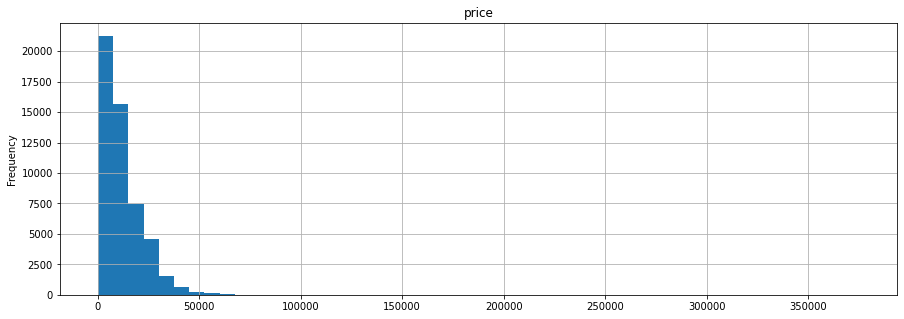

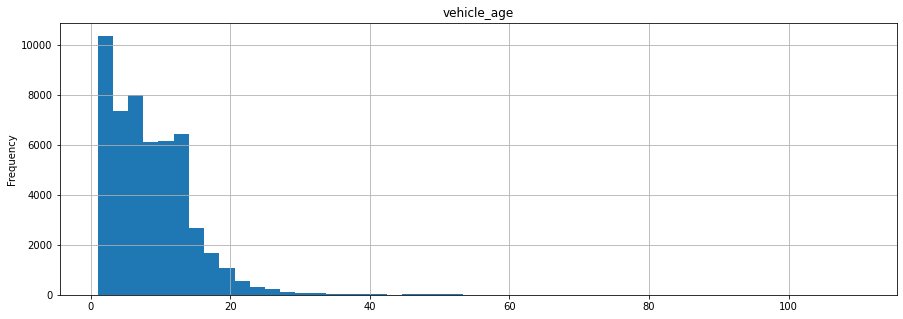

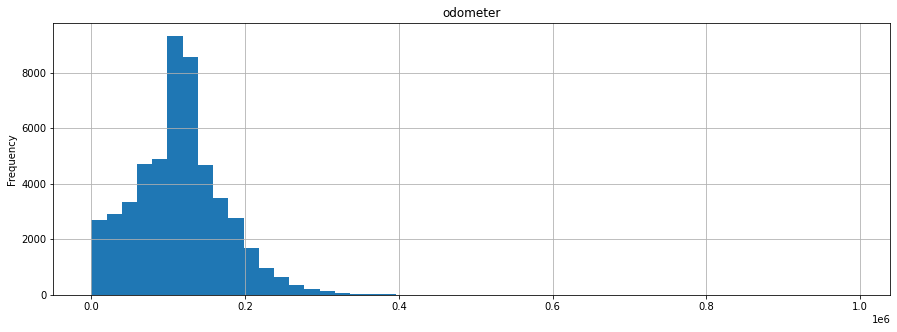

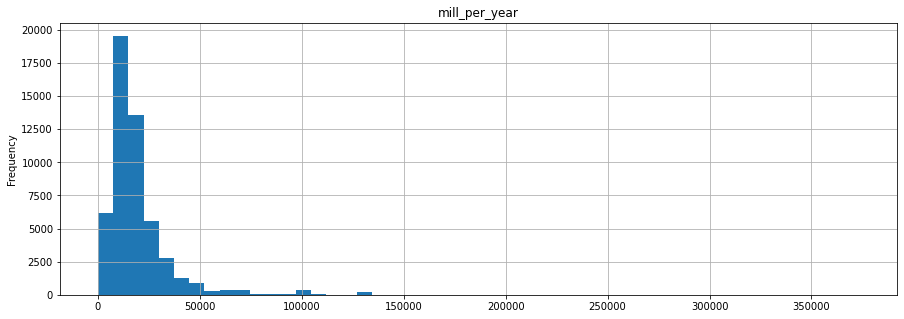

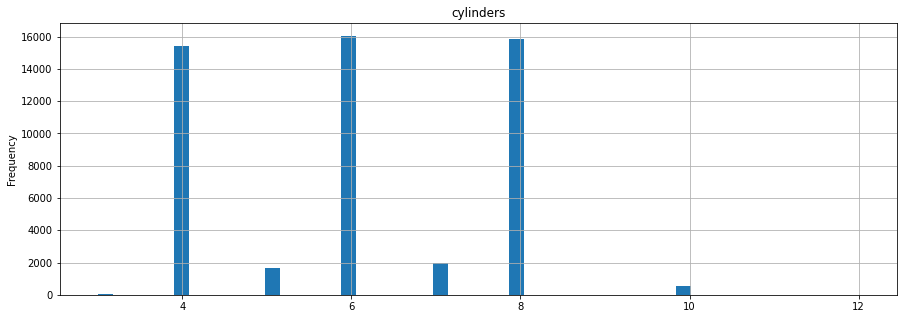

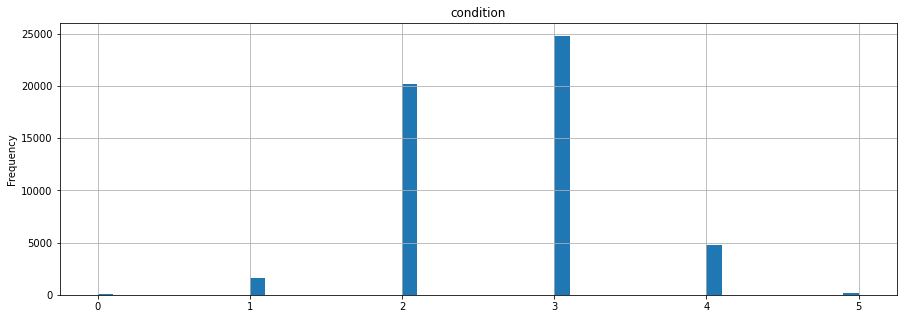

In [131]:
for col in columns:
    df[col].plot.hist(bins=50, grid=True, figsize=(15, 5))
    plt.title(col)
    plt.show()

From the graphs, the following is observed:
- `price`: It can be seen that the histogram is within the limits 0 to 350,000 despite the fact that most of the data is clustered between approximately 0 and 4,000. Therefore, it can be concluded that this column presents atypical values that can range between 4,000 and 350,000.
- `vehicle_age`: In this case, it is observed that the data agglomeration is between approximately 1 and 30, but there are data that are very far apart between 30 and 100 years. Therefore, it can be concluded that this column has outliers.
- `odometer`: it is observed that approximately 30% of the data is agglomerated and 70% of them are very far apart, considering them atypical.
- `mill_per_year`: It is observed that there is an agglomeration of data between 0 and 50,000, then there is a pattern with maximums and minimums until reaching 140,000 and with outliers that reach up to 350,000.
- `cylinders`: Very obvious data peaks are observed in 4, 6 and 8, as well as very minimal values in 2 and 12 that can be considered atypical.
- `condition`: Data are specific categories with minimum values of 0 and 5.

## Study and treatment of outliers

With the previous results, we will determine which columns may contain outlier values and thus create a new dataframe without these values. To do this, we will use the box plot or box plot and we will rely on the interquartile range to have better visibility of the limits in the data set.

El IQR de price es: 11839.0.
El límite inferior es -12758.5 y el límite superior es 34597.5.


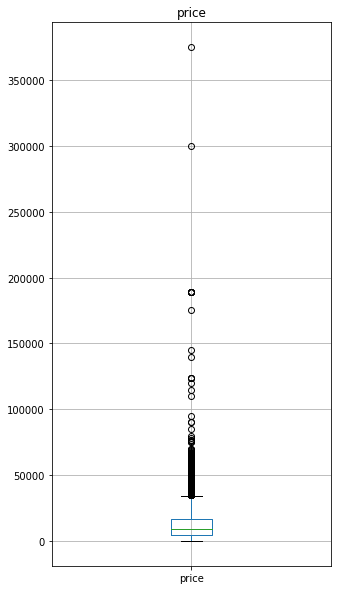

El IQR de vehicle_age es: 8.0.
El límite inferior es -8.0 y el límite superior es 24.0.


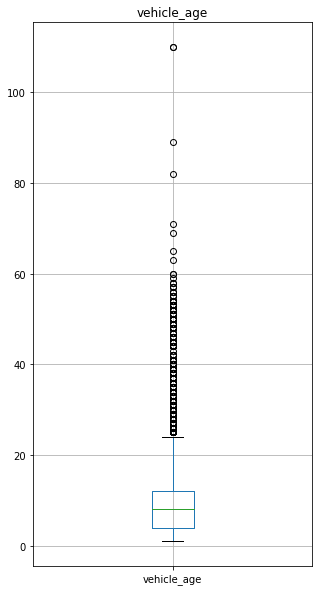

El IQR de odometer es: 72153.0.
El límite inferior es -32561.5 y el límite superior es 256050.5.


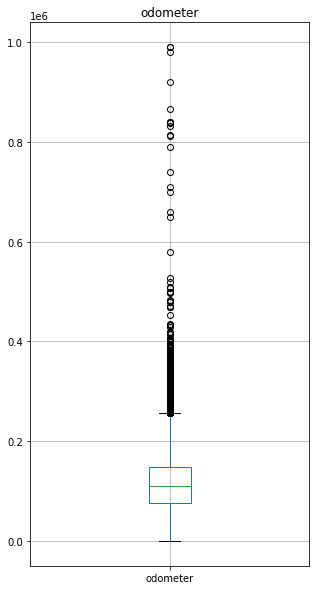

El IQR de mill_per_year es: 11377.0.
El límite inferior es -6642.5 y el límite superior es 38865.5.


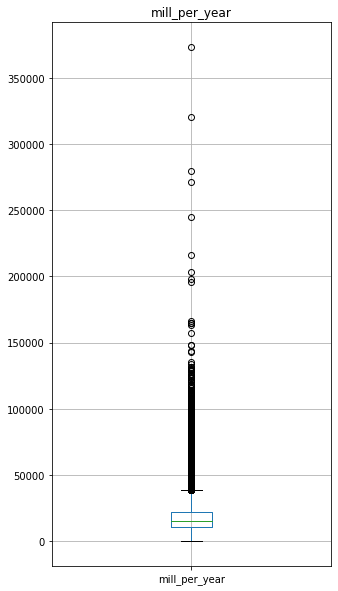

El IQR de cylinders es: 4.0.
El límite inferior es -2.0 y el límite superior es 14.0.


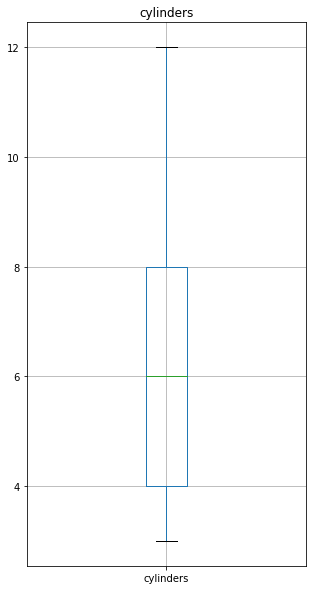

El IQR de condition es: 1.0.
El límite inferior es 0.5 y el límite superior es 4.5.


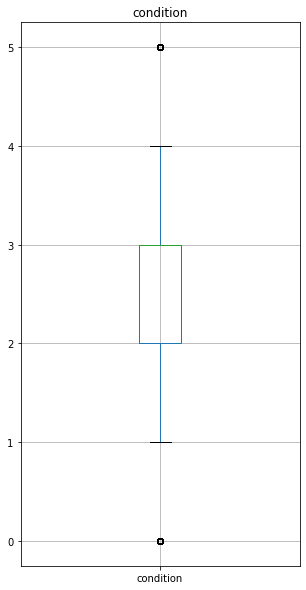

In [132]:
# calculating the interquartile range to get the lower and upper limits
for col in columns:
    
    Q3 = df[col].describe()[6]
    Q1 = df[col].describe()[4]
    IQR = Q3 - Q1
    print(f'El IQR de {col} es: {IQR}.')
    
    
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    print(f'El límite inferior es {lower_limit} y el límite superior es {upper_limit}.')
    
    
    df.boxplot(column=col, grid=True, figsize=(5, 10))
    plt.title(col)
    plt.show()


From the graphs, the following is observed:
- `price`: It is observed that the lower price limit is -12758.5 which can be interpreted as 0 and the upper limit is 34597.5, that is, a price greater than 34597.5 will be considered atypical and will not be part of the new dataframe. However, it is rare for a vehicle to have a price of 0.
above 50,000 that could be considered atypical.
- `vehicle_age`: It is observed that the lower limit of the car's age is -8 which can be interpreted as 0 and the upper limit is 24, that is, a vehicle older than 24 years will be considered atypical and will not be part of the new dataframe.
- `odometer`: It is observed that the lower mileage limit is -32561.5 which can be interpreted as 0 and the upper limit is 256050.5, that is, a vehicle with a mileage greater than 256050.5 will be considered atypical and will not be part of the new dataframe.
- `mill_per_year`: It is observed that the lower limit of mileage per year is -6642.5 which can be interpreted as 0 and the upper limit is 38865.5, that is, a vehicle with mileage per year greater than 38865.5 will be considered atypical and will not will be part of the new dataframe.
- `cylinders`: It is observed that the lower limit of cylinder capacity is -2 which can be interpreted as 0 and the upper limit is 14, that is, a vehicle with a cylinder capacity greater than 14 will be considered atypical; however the minimum value in this column is 3 and the maximum is 12 which means that 'cylinders' has no outliers.
- `condition`: It is observed that the lower condition limit is 0.5 and the upper limit is 4.5, that is, a vehicle in condition 0 (salvage) and 5 (new) will be considered atypical and will not be part of the new dataframe.

We create a new dataframe omitting the outliers, to do this, we obtain the upper and lower limits of each column and filter the original dataframe to save it in a new one.

In [133]:

price_lower_limit = df['price'].describe()[4] - 1.5 * (df['price'].describe()[6] - df['price'].describe()[4])
price_upper_limit = df['price'].describe()[6] + 1.5 * (df['price'].describe()[6] - df['price'].describe()[4])

vehicle_lower_limit = df['vehicle_age'].describe()[4] - 1.5 * (df['vehicle_age'].describe()[6] - df['vehicle_age'].describe()[4])
vehicle_upper_limit = df['vehicle_age'].describe()[6] + 1.5 * (df['vehicle_age'].describe()[6] - df['vehicle_age'].describe()[4])

odometer_lower_limit = df['odometer'].describe()[4] - 1.5 * (df['odometer'].describe()[6] - df['odometer'].describe()[4])
odometer_upper_limit = df['odometer'].describe()[6] + 1.5 * (df['odometer'].describe()[6] - df['odometer'].describe()[4])

mill_lower_limit = df['mill_per_year'].describe()[4] - 1.5 * (df['mill_per_year'].describe()[6] - df['mill_per_year'].describe()[4])
mill_upper_limit = df['mill_per_year'].describe()[6] + 1.5 * (df['mill_per_year'].describe()[6] - df['mill_per_year'].describe()[4])

cylinders_lower_limit = df['cylinders'].describe()[4] - 1.5 * (df['cylinders'].describe()[6] - df['cylinders'].describe()[4])
cylinders_upper_limit = df['cylinders'].describe()[6] + 1.5 * (df['cylinders'].describe()[6] - df['cylinders'].describe()[4])

condition_lower_limit = df['condition'].describe()[4] - 1.5 * (df['condition'].describe()[6] - df['condition'].describe()[4])
condition_upper_limit = df['condition'].describe()[6] + 1.5 * (df['condition'].describe()[6] - df['condition'].describe()[4])

In [134]:

df_clean = df.query('@price_lower_limit < price < @price_upper_limit and @vehicle_lower_limit < vehicle_age < @vehicle_upper_limit and @odometer_lower_limit < odometer < @odometer_upper_limit and @mill_lower_limit < mill_per_year < @mill_upper_limit and @cylinders_lower_limit < cylinders < @cylinders_upper_limit and @condition_lower_limit < condition < @condition_upper_limit')
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mill_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7,20714.0
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,7,12672.0
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.0
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,0,2019-03-22,9,16,11350.0
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,4,14488.0


## Step 7. Study main parameters without outliers
In this section we compare the previous histograms that had outliers with those of the new dataframe.

### price

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

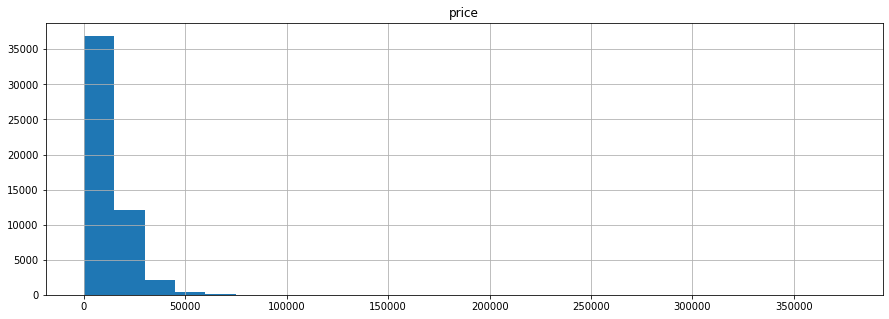

In [135]:
# Histogram of the original dataframe
df.hist('price',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

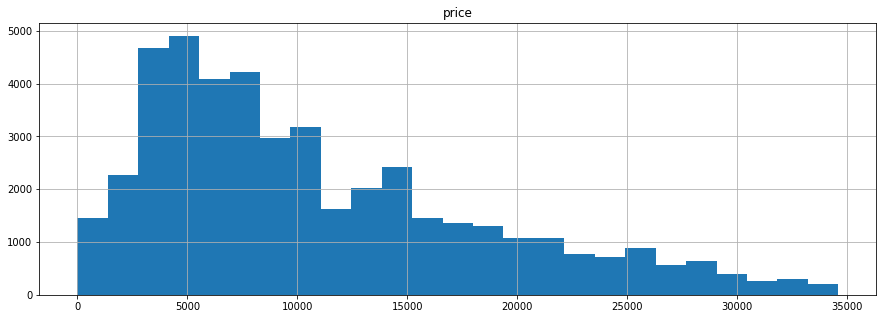

In [136]:
# Histogram of the new dataframe
df_clean.hist('price',bins=25,figsize=(15,5))

In this other histogram, you can clearly see the difference of the figure of the graph that forms a triangle without leaving empty spaces as in the previous graph.
In addition, it is observed that most vehicles have a price of 5000 and in the smallest part they have the most expensive price of almost 35000.

### vehicle_age

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

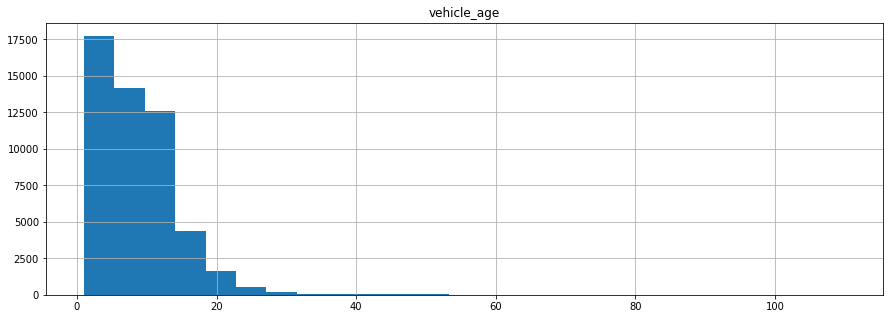

In [143]:
# Histogram of the original dataframe
df.hist('vehicle_age',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

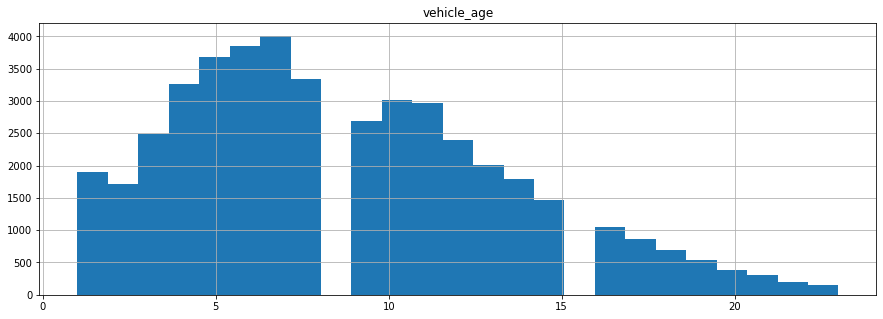

In [144]:
# Histogram of the new dataframe
df_clean.hist('vehicle_age',bins=25,figsize=(15,5))

In this new histogram it is observed that the data is distributed throughout the plane in 3 blocks: 1 to 8, 9 to 15 and 16 to 24 as the age of the vehicle.

### odometer

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

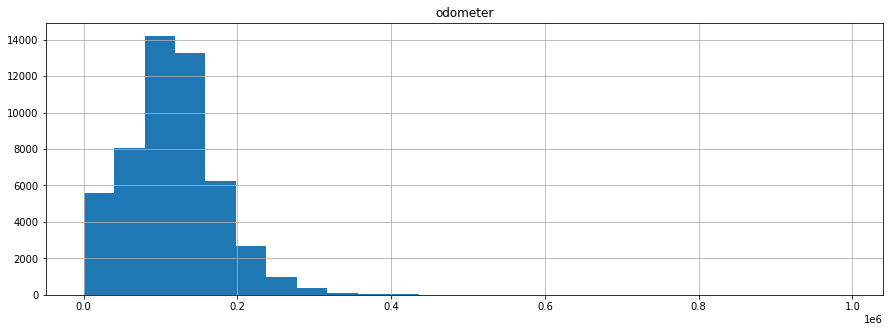

In [145]:
# Histogram of the original dataframe
df.hist('odometer',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

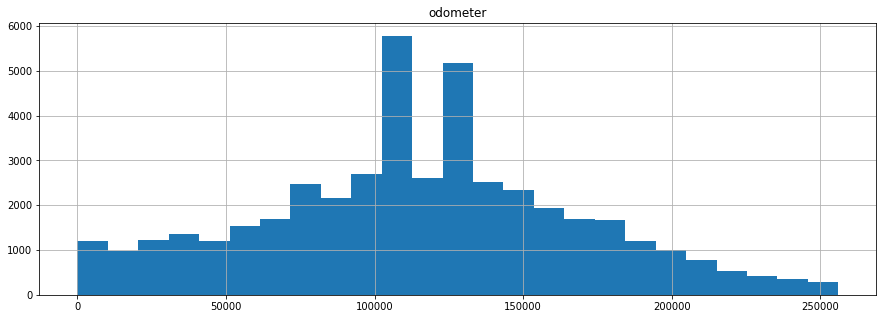

In [146]:
# Histogram of the new dataframe
df_clean.hist('odometer',bins=25,figsize=(15,5))

In this new graph, you can see a more uniform distribution unlike the previous one, this histogram goes from 0 to 250,000 kilometers.

### mill_per_year

array([[<AxesSubplot:title={'center':'mill_per_year'}>]], dtype=object)

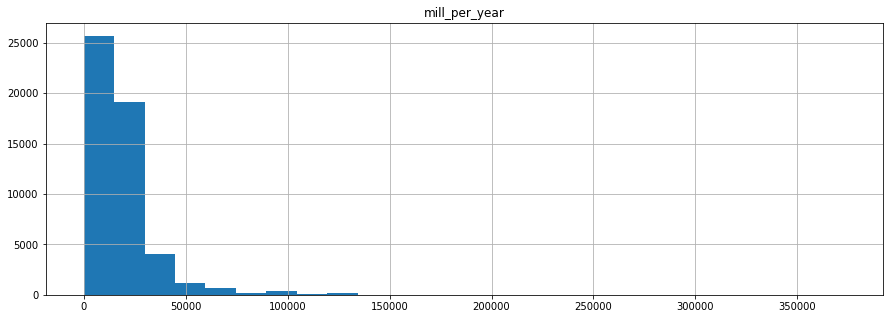

In [147]:
# Histogram of the original dataframe
df.hist('mill_per_year',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'mill_per_year'}>]], dtype=object)

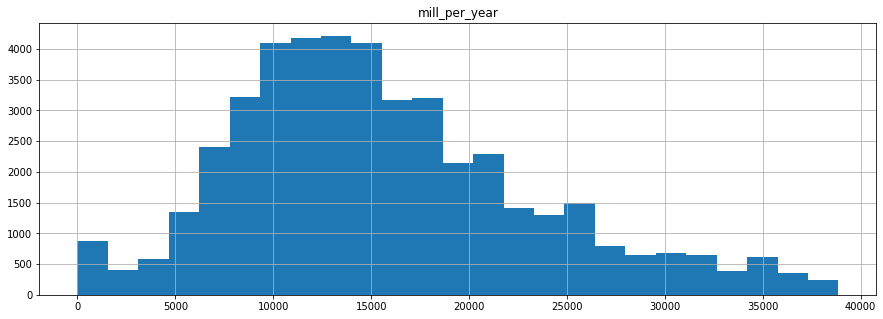

In [148]:
# Histogram of the new dataframe
df_clean.hist('mill_per_year',bins=25,figsize=(15,5))

In this new graph you can see a better distribution of the data unlike the previous one, in this case the values are between 0 kilometers to less than 40,000.

### cylinders

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

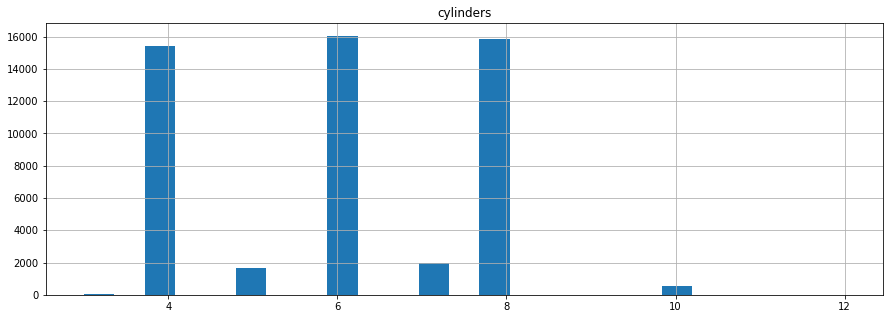

In [149]:
# Histogram of the original dataframe
df.hist('cylinders',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

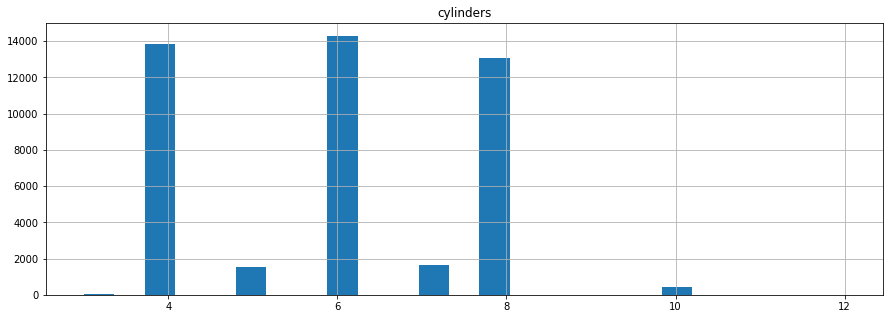

In [150]:
# Histogram of the new dataframe
df_clean.hist('cylinders',bins=25,figsize=(15,5))

This column shows that there were no differences in the graph because it did not present atypical values, therefore, it remains as the previous graph.

### id_condition

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

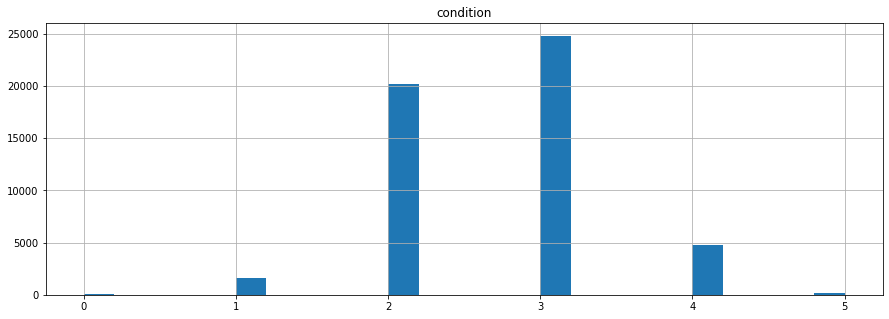

In [151]:
# Histogram of the original dataframe
df.hist('condition',bins=25,figsize=(15,5))

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

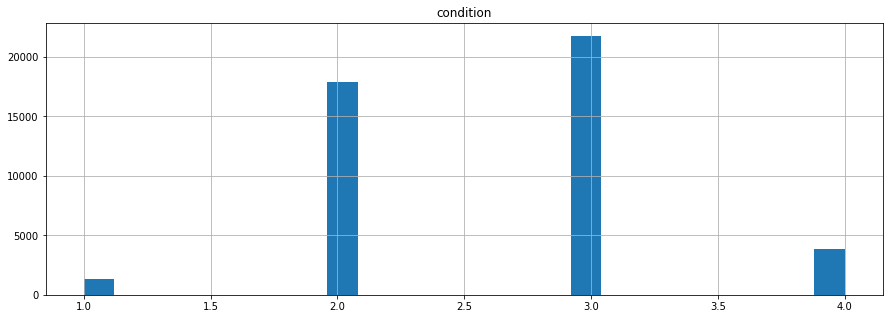

In [152]:
# Histogram of the new dataframe
df_clean.hist('condition',bins=25,figsize=(15,5))

In this case, a difference is displayed with the extreme values of 0 and 5 no longer found in the new histogram, therefore vehicles in new or salvage condition are omitted.

## Step 8. Hypothesis testing

### Ad placement period

In this section we will analyze how many days the ads were shown (`days_listed`), we will calculate the mean and median to determine when the ads are quickly removed and when they are published for an abnormally long time.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

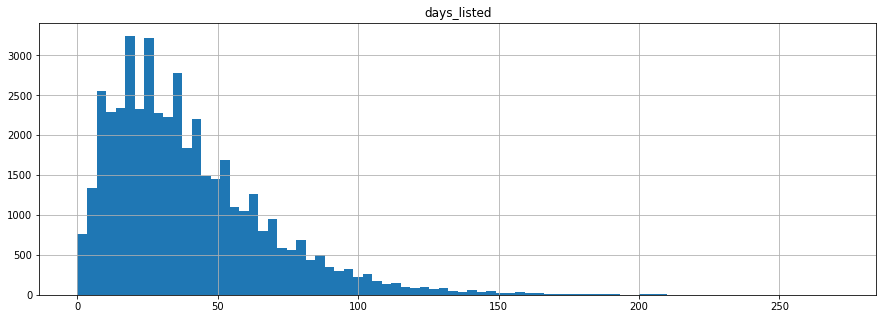

In [158]:
df_clean.hist('days_listed',bins=80,figsize=(15,5))

In this graph you can see that most of the advertisements were between approximately 20 and 25 days, there were cases where they were withdrawn without completing 1 day and cases where they even exceeded 250 days.

In [163]:
print(df_clean['days_listed'].mean())
print(df_clean['days_listed'].median())

39.54184058391554
33.0


El IQR de "days_listed" es: 34.0.
El límite inferior es -32.0 y el límite superior es 104.0.


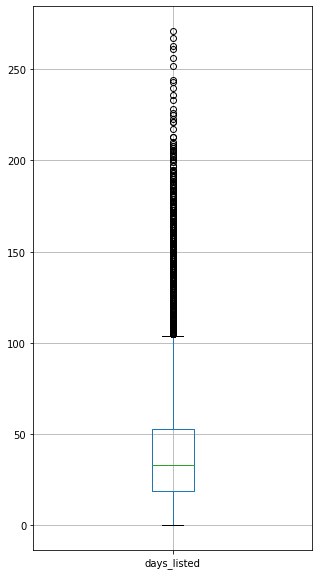

In [165]:

df.boxplot(column='days_listed', grid=True, figsize=(5, 10))
Q3 = df['days_listed'].describe()[6]
Q1 = df['days_listed'].describe()[4]
IQR = Q3 - Q1
print(f'El IQR de "days_listed" es: {IQR}.')
    

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(f'El límite inferior es {lower_limit} y el límite superior es {upper_limit}.')

On average, the days that an ad is published is 39; However, there are cases where the advertisement can be maintained for 50 to 104 days, which is the maximum limit; After that, they are atypical cases that can last up to 250 days.

It can be seen that the ads are listed for an average of 39 days, however, it is observed that there were ads with 250 days listed and some abnormally longer, lasting 271 days.

### Average price for each type of vehicle
In this section we analyze the number of ads and the average price for each type of vehicle. To do this, we draw a graph showing the dependence of the number of ads on each type of vehicle. Then, we select the two types with the highest number of ads.

<AxesSubplot:>

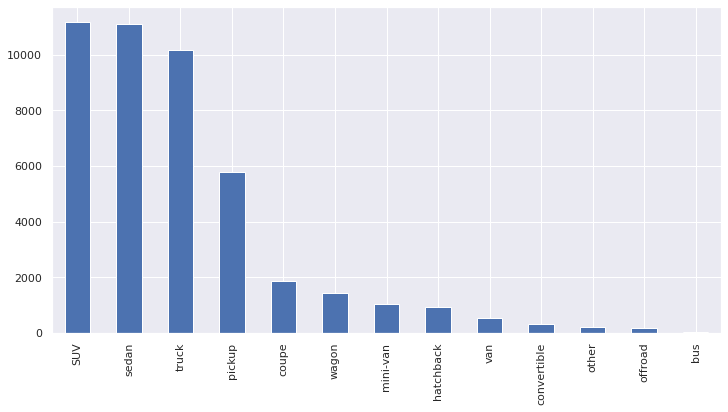

In [189]:
df_clean['type'].value_counts(ascending=False).plot(kind='bar', grid=True, figsize=(12,6))

In [175]:
df_clean.groupby('type')['price'].mean().sort_values(ascending=False)

type
bus            18107.428571
truck          14689.120666
pickup         14588.004670
offroad        14085.971751
coupe          12970.020734
convertible    12948.642202
SUV            10119.677743
other           9963.258216
wagon           8790.027778
van             8377.902622
mini-van        7602.962157
sedan           6689.483575
hatchback       6582.933050
Name: price, dtype: float64

<AxesSubplot:xlabel='type'>

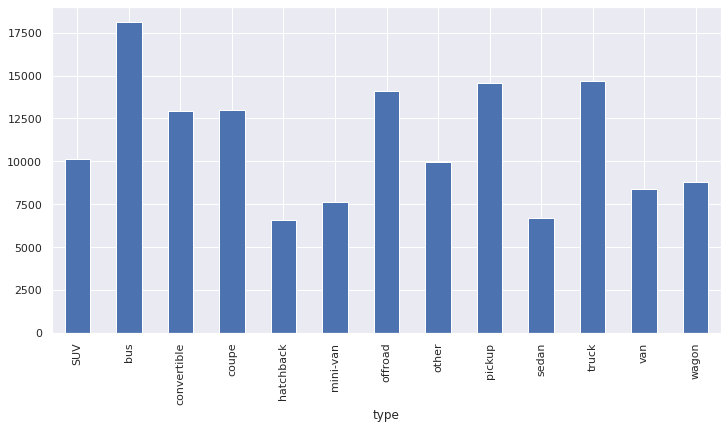

In [191]:
df_clean.groupby('type')['price'].mean().plot(kind='bar', grid=True, figsize=(12,6))

From the graphs shown the following is observed:
- SUV, sedan, truck and pickup are the types of vehicles with the greatest number of advertisements, exceeding 10,000.
- Bus, truck, pickup and offroad are the types of vehicles that have the highest cost, with the bus type being the one with the highest price at 18,000 and the remaining three exceeding 13,000.

### Price factors
In this last section, we take the most popular types that have been detected in the previous phase and we will study if the price depends on age, mileage, condition, transmission type and color. For the categorical variables (transmission type and color) we will plot box and whisker plots and create scatter plots for the rest. When analyzing categorical variables, note that categories must have at least 50 ads; If not, its parameters will not be valid for analysis.

We filter the dataframe without outliers with only the 6 types of vehicles with the most ads and with the highest price and we will save it in the variable `filtered_df_clean`.

In [195]:
# filter the df_clean dataframe with the types of cars: bus, truck, pickup and offroad.
filtered_df_clean = df_clean.query('type in ("bus","truck","pickup","offroad","SUV","sedan")')

In [196]:
#We create a list with the columns that we are interested in studying.
columns_2 = ['price', 'vehicle_age', 'odometer', 'condition', 'mill_per_year']

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='mill_per_year', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='mill_per_year', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>,
        <AxesSubplot:xlabel='mill_per_year', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:

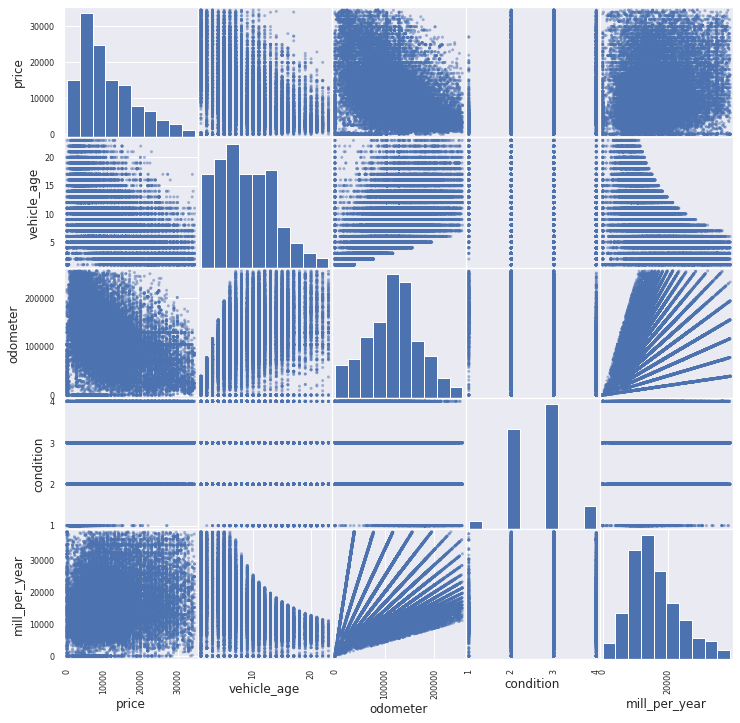

In [201]:
# We draw a correlation diagram with the filtered dataframe and the list we just created.
pd.plotting.scatter_matrix(filtered_df_clean[columns_2], figsize = (12,12))

In [198]:
#We plot a correlation matrix.
filtered_df_clean[columns_2].corr()

,price,vehicle_age,odometer,condition,mill_per_year
price,1.000000,-0.497874,-0.402572,0.196557,0.227996
vehicle_age,-0.497874,1.000000,0.548759,-0.285042,-0.578965
odometer,-0.402572,0.548759,1.000000,-0.311857,0.192281
condition,0.196557,-0.285042,-0.311857,1.000000,0.042393
mill_per_year,0.227996,-0.578965,0.192281,0.042393,1.000000


The following is interpreted from the matrices:
- The younger the vehicle is, the price will be higher, that is, the more current the car model, the more it will cost.
- The lower the mileage of the vehicle, the higher the price.
- The better the condition of the vehicle, the higher the price, that is, the better the condition of the car, the higher its value.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

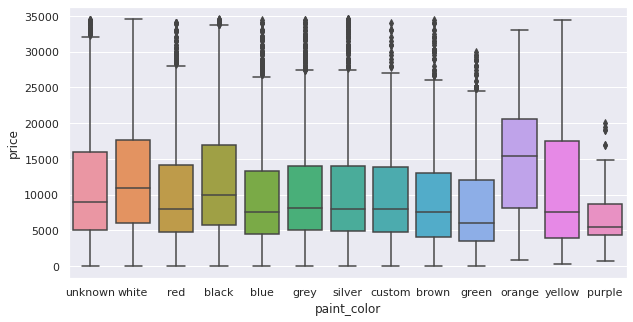

In [199]:
# drawing a box plot for the price according to the color of the car.
sns.set(rc={"figure.figsize":(10, 5)})
sns.boxplot(data=filtered_df_clean, x='paint_color', y='price')

From the boxplot presented it is observed that orange, white and yellow cars could cost more than the others; However, the median of all colors is between 5000 and 12000, except for the color orange whose median exceeds the price value 15000.

<AxesSubplot:xlabel='transmission', ylabel='price'>

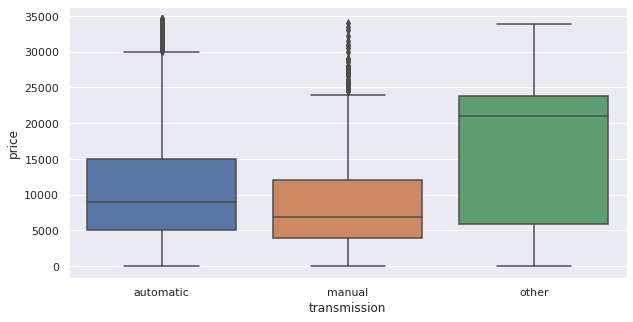

In [200]:
#drawing a box plot for the price according to the type of transmission of the car.
sns.boxplot(data=filtered_df_clean, x='transmission', y='price')

From the boxplot presented, it is observed that the cars that are neither automatic nor manual are the ones that mostly have the highest price.

## General conclusion


1. During the data exploration, problems were found with the data in some columns, from presenting missing values to having an inappropriate typology. It is presumed that in the case of the `is_4wd` columns the missing values must have been `0` and that is why they were omitted from the record; For the other columns with missing values, it is believed that there were human errors when recording the data since they did not show any pattern that can be related.
2. To treat the missing data, the relationships of the columns had to be conceptually analyzed to identify which characteristic is related to or has greater dependence on the columns that present null values. In this way, `model_year` was completed with the median based on `model`, `cylinders` with the median of `type`, `odometer` with the median of `condition` and in the case of `paint_color` it was completed with the value `unknown`.
3. Next was the enrichment of the dataframe with new data such as the year of the date the advertisement was placed and the age of the vehicle. This allowed us to study and treat the main parameters, analyzing, with the help of boxplot, whether they have atypical values.
4. Once the atypical data were identified, a clean dataframe was created that served to draw a histogram for each column to be studied and compare them with the previous graphs.
5. Finally, the following is concluded:
- Truck and pickup type vehicles are more popular in terms of the number of ads and cost more than the others.
- The more current the car model, the more it will cost.
- The lower the mileage of the vehicle, the higher the price.
- The better the condition of the car, the greater its value.
- The color of the car and the type of transmission do not influence the price much.